In [176]:
#importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split

Week 01:

Objective:- To set up the project environment and gather the necessary data for model development.


In [177]:
# Loading the given dataset as 'credit_df'
credit_df = pd.read_csv("C:/Users/jeffy/Downloads/credit.csv",index_col= "Customer_ID")

In [178]:
credit_df

,ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Customer_ID,,,,,,,,,,,,,,,,,,,,,
3392,5634,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
3392,5635,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
3392,5636,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3392,5637,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
3392,5638,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37932,155625,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
37932,155626,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
37932,155627,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,6.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor


# Data Preprocessing

In [179]:
credit_df.columns

Index(['ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [180]:
# Get the shape of the 'credit_df'
df_shape = credit_df.shape

# Print the number of features and observations
print(f"Number of Features:{df_shape[1]-1}")
print(f"Number of Observations:{df_shape[0]}")

Number of Features:26
Number of Observations:100000


In [181]:
# Displaying information about the 'credit_df'
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 3392 to 37932
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Month                     100000 non-null  int64  
 2   Name                      100000 non-null  object 
 3   Age                       100000 non-null  float64
 4   SSN                       100000 non-null  float64
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  float64
 7   Monthly_Inhand_Salary     100000 non-null  float64
 8   Num_Bank_Accounts         100000 non-null  float64
 9   Num_Credit_Card           100000 non-null  float64
 10  Interest_Rate             100000 non-null  float64
 11  Num_of_Loan               100000 non-null  float64
 12  Type_of_Loan              100000 non-null  object 
 13  Delay_from_due_date       100000 non-null 

In [182]:
# Checking missing value
if not credit_df.isna().sum().any():
    print("'credit_df' does not have any null values.")

'credit_df' does not have any null values.


# DUPLICATE VALUES

In [183]:
# Checking duplicate value
if not credit_df.duplicated().any():
    print("'credit_df' does not have any duplicate value.")

'credit_df' does not have any duplicate value.


# OUTLIERS

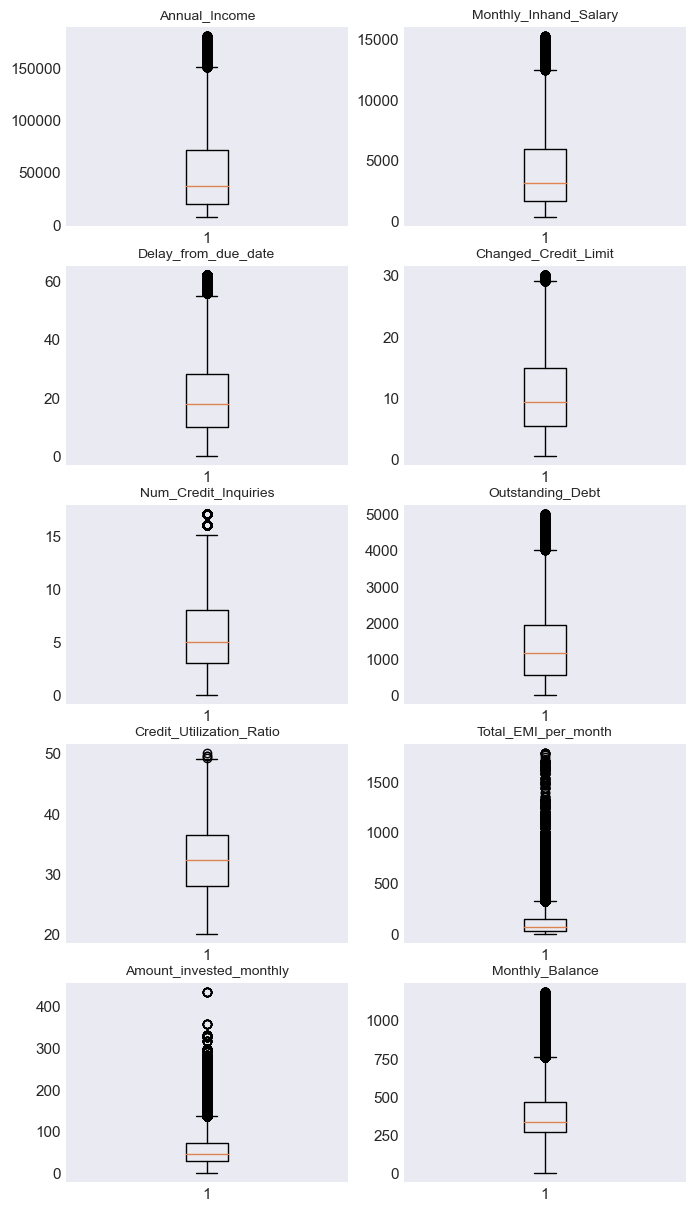

In [184]:
# Define the columns with potential outliers
outlier_columns = ['Annual_Income', 'Monthly_Inhand_Salary',
                   'Delay_from_due_date', 'Changed_Credit_Limit',
                   'Num_Credit_Inquiries', 'Outstanding_Debt',
                   'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                   'Amount_invested_monthly', 'Monthly_Balance',]

# Setting the plot style and figure size
plt.style.use('seaborn-v0_8-dark')
plt.figure(figsize=(8,15))

# Iterate through the outlier columns and create boxplots
for n,i in zip(range(1,11),range(0,10)):
    plt.subplot(5,2,n)
    plt.boxplot(credit_df[outlier_columns[i]])
    plt.title(outlier_columns[i], fontsize=10)

# Display the plot
plt.show()

In [185]:
#function to list out the outlier values
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data:
        if (upr_bound):
            outliers.append(i)
    return outliers

In [186]:
#outliers with median value
for feature in outlier_columns:
    outliers = detect_outliers_iqr(credit_df[feature])
    impute_value = credit_df[feature].median()
    filter = credit_df[feature] >= np.min(outliers)
    credit_df.loc[filter,feature] = impute_value

In [187]:
credit_df.drop(['ID','SSN'],axis=1, inplace=True)

# EDA

In [188]:
credit_cal=credit_df.select_dtypes(include='object')
credit_num=credit_df.select_dtypes(include='number')

In [189]:
credit_cal.describe().T

,count,unique,top,freq
Name,100000,10128,Jessicad,48
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28616
Credit_Score,100000,3,Standard,53174


In [190]:
for cat_col in credit_cal:
    print(credit_cal[cat_col].value_counts())
    print('\n-------------')
     

Jessicad              48
Langep                48
Stevex                48
Vaughanl              40
Ronald Groverk        40
                      ..
Breidthardtj           8
Sven Egenterx          8
Antonella Ciancioc     8
Valentina Zan          8
Nicks                  8
Name: Name, Length: 10128, dtype: int64

-------------
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

-------------
No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder

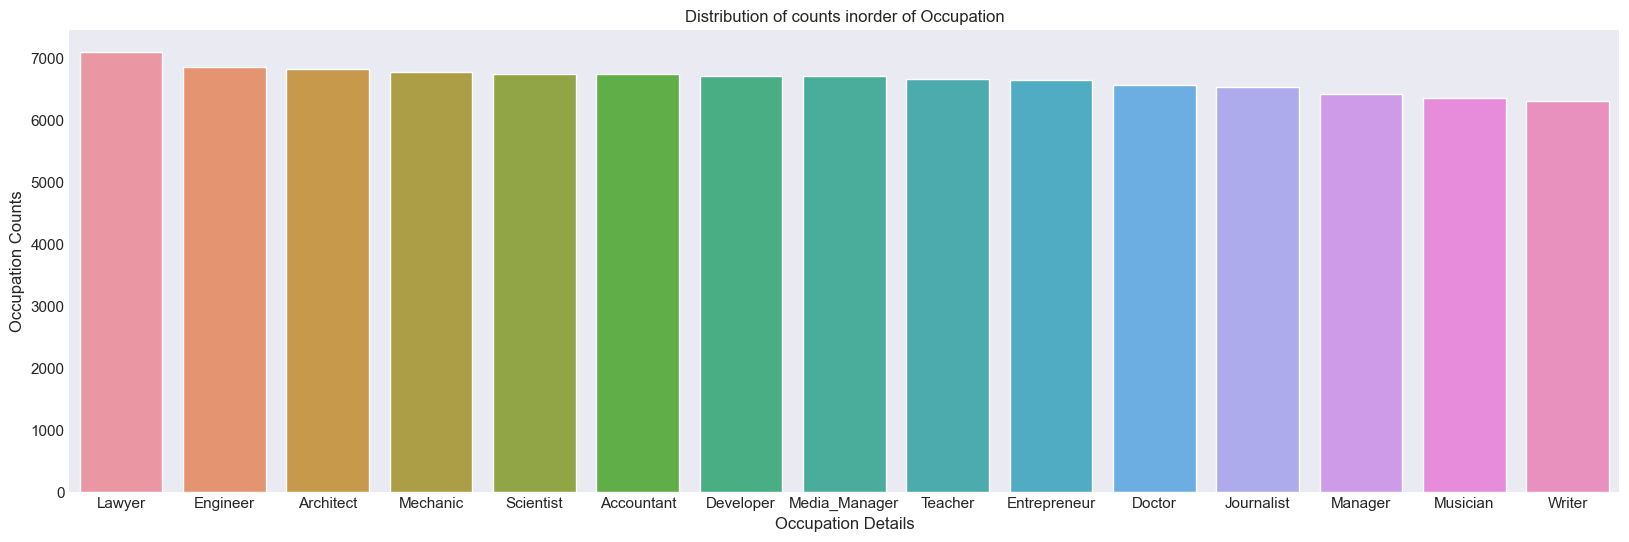

In [191]:
#occupation
plt.figure(figsize=(20,6))
ax=sns.countplot(x='Occupation',data=credit_cal,order=credit_df['Occupation'].value_counts().index)
plt.title('Distribution of counts inorder of Occupation')
plt.xlabel('Occupation Details')
plt.ylabel("Occupation Counts")
plt.show()

Occupation count is shown in ascending order.Lawyer comes first in category occupation

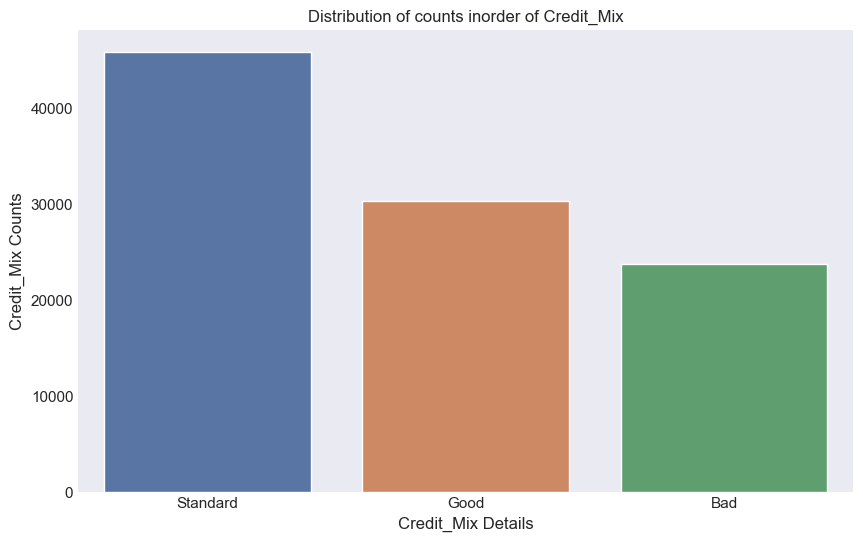

In [192]:
#credit mix
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Credit_Mix',data=credit_cal,order=credit_df['Credit_Mix'].value_counts().index)
plt.title('Distribution of counts inorder of Credit_Mix')
plt.xlabel('Credit_Mix Details')
plt.ylabel("Credit_Mix Counts")
plt.show()

Standard category have majority.

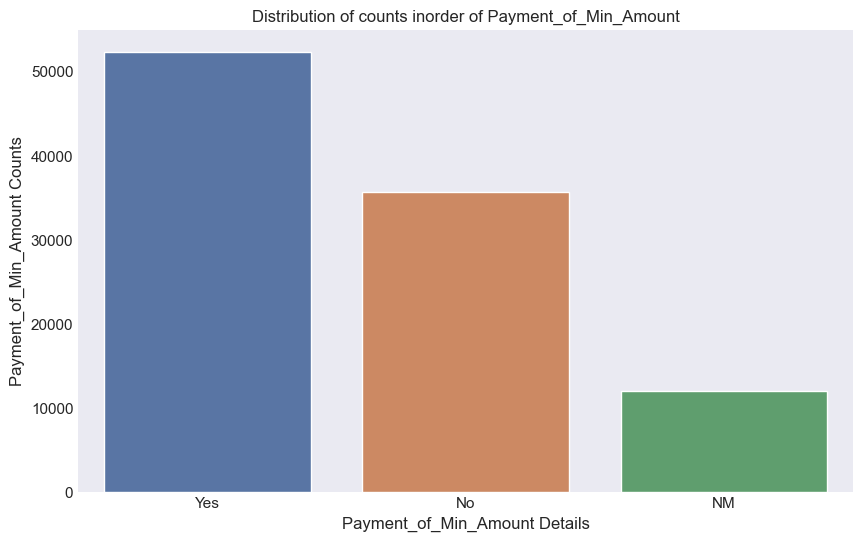

In [193]:
#Payment_of_Min_Amount
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Payment_of_Min_Amount',data=credit_cal,order=credit_df['Payment_of_Min_Amount'].value_counts().index)
plt.title('Distribution of counts inorder of Payment_of_Min_Amount')
plt.xlabel('Payment_of_Min_Amount Details')
plt.ylabel("Payment_of_Min_Amount Counts")
plt.show()

In payment_of_min_amount 'YES' is above 50000.'NO' is between 40000 and 30000

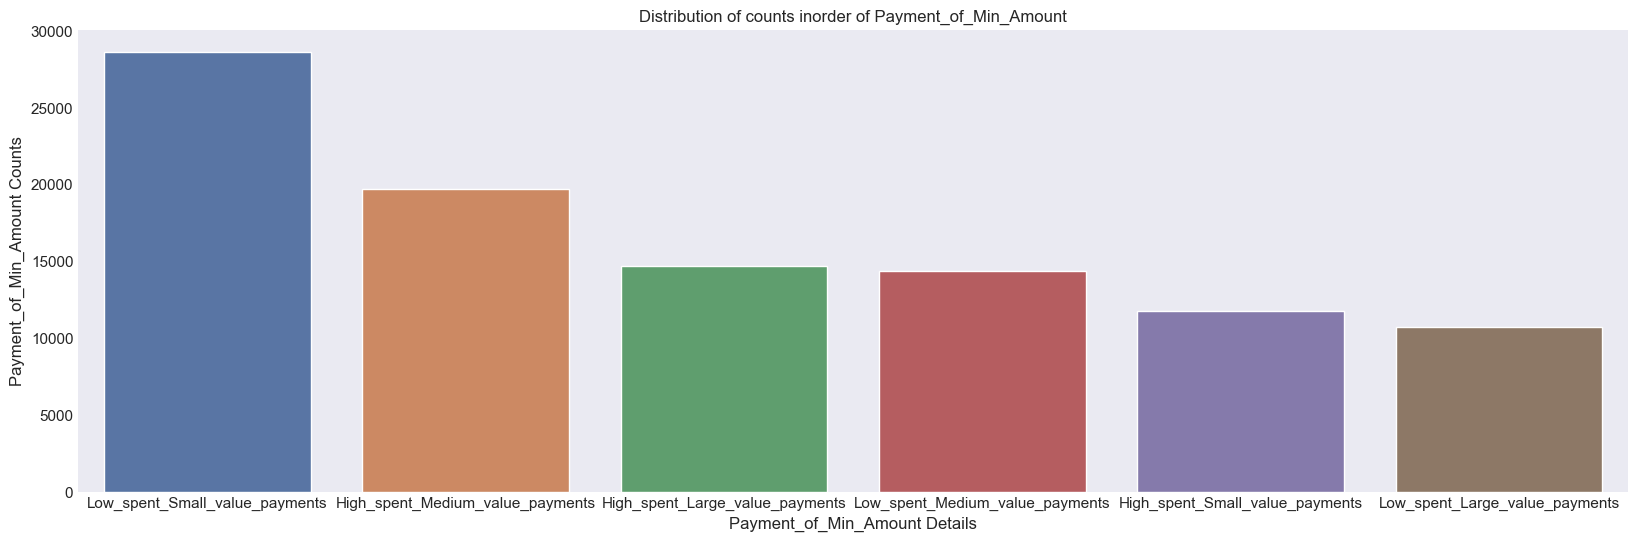

In [194]:
#Payment_Behaviour
plt.figure(figsize=(20,6))
ax=sns.countplot(x='Payment_Behaviour',data=credit_cal,order=credit_df['Payment_Behaviour'].value_counts().index)
plt.title('Distribution of counts inorder of Payment_of_Min_Amount')
plt.xlabel('Payment_of_Min_Amount Details')
plt.ylabel("Payment_of_Min_Amount Counts")
plt.show()

here shows the payment behaviour in ascending order .Low_spent_small_value_payment is highest and low_spent_large_value_payments

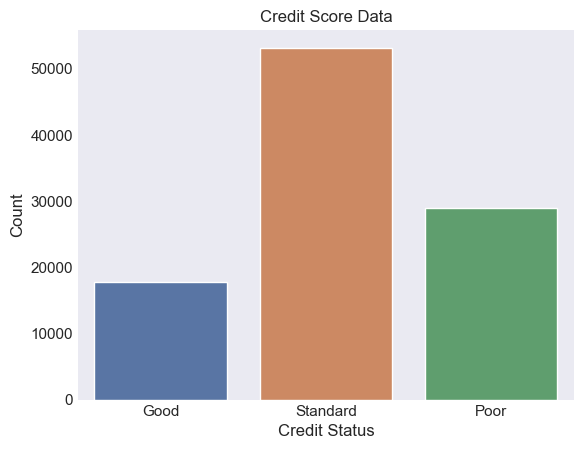

In [195]:
ax = sns.countplot(x = 'Credit_Score',data = credit_df)
plt.title('Credit Score Data')
plt.xlabel('Credit Status')
plt.ylabel('Count')
plt.show()

standard is the highest in credit status and good is the lowest

In [196]:
credit_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,100000.0,4.500000,2.291299e+00,1.000000,2.750000,4.500000,6.250000,8.000000
Age,100000.0,33.316340,1.076481e+01,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,100000.0,36999.705000,4.872006e-08,36999.705000,36999.705000,36999.705000,36999.705000,36999.705000
Monthly_Inhand_Salary,100000.0,3095.905000,2.850371e-09,3095.905000,3095.905000,3095.905000,3095.905000,3095.905000
Num_Bank_Accounts,100000.0,5.368820,2.593314e+00,0.000000,3.000000,5.000000,7.000000,11.000000
Num_Credit_Card,100000.0,5.533570,2.067098e+00,0.000000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,100000.0,14.532080,8.741330e+00,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.532880,2.446356e+00,0.000000,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,100000.0,18.000000,0.000000e+00,18.000000,18.000000,18.000000,18.000000,18.000000
Num_of_Delayed_Payment,100000.0,13.313120,6.237166e+00,0.000000,9.000000,14.000000,18.000000,25.000000


In [197]:
corr_format= credit_num.corr()
corr_format

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Month,1.000000e+00,0.016990,NaN,NaN,0.000079,0.000090,6.790115e-18,1.555542e-16,NaN,0.000115,NaN,NaN,NaN,NaN,0.022784,NaN,NaN,NaN
Age,1.698955e-02,1.000000,NaN,NaN,-0.190415,-0.148567,-2.175571e-01,-2.135330e-01,NaN,-0.184264,NaN,NaN,NaN,NaN,0.234618,NaN,NaN,NaN
Annual_Income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_Bank_Accounts,7.909795e-05,-0.190415,NaN,NaN,1.000000,0.442694,5.843015e-01,4.724831e-01,NaN,0.601842,NaN,NaN,NaN,NaN,-0.485331,NaN,NaN,NaN
Num_Credit_Card,8.973261e-05,-0.148567,NaN,NaN,0.442694,1.000000,4.979115e-01,4.179595e-01,NaN,0.423300,NaN,NaN,NaN,NaN,-0.417205,NaN,NaN,NaN
Interest_Rate,6.790115e-18,-0.217557,NaN,NaN,0.584302,0.497912,1.000000e+00,5.591562e-01,NaN,0.571457,NaN,NaN,NaN,NaN,-0.576230,NaN,NaN,NaN
Num_of_Loan,1.555542e-16,-0.213533,NaN,NaN,0.472483,0.417960,5.591562e-01,1.000000e+00,NaN,0.473919,NaN,NaN,NaN,NaN,-0.605727,NaN,NaN,NaN
Delay_from_due_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num_of_Delayed_Payment,1.154567e-04,-0.184264,NaN,NaN,0.601842,0.423300,5.714569e-01,4.739186e-01,NaN,1.000000,NaN,NaN,NaN,NaN,-0.481965,NaN,NaN,NaN


# Heat Map

<Axes: >

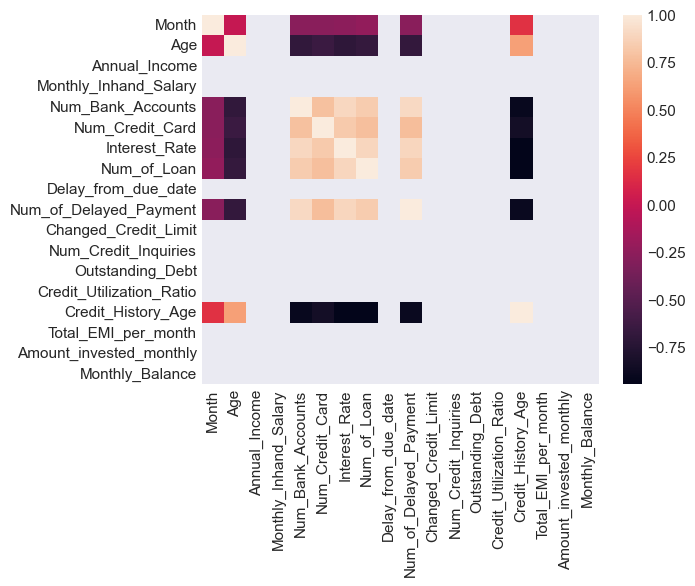

In [198]:
sns.heatmap(corr_format.corr())

In [199]:
credit_df

,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Customer_ID,,,,,,,,,,,,,,,,,,,,,
3392,1,Aaron Maashoh,23.0,Scientist,36999.705,3095.905,3.0,4.0,3.0,4.0,...,Good,1166.155,32.305784,265.0,No,66.462304,45.15655,High_spent_Small_value_payments,333.865366,Good
3392,2,Aaron Maashoh,23.0,Scientist,36999.705,3095.905,3.0,4.0,3.0,4.0,...,Good,1166.155,32.305784,266.0,No,66.462304,45.15655,Low_spent_Large_value_payments,333.865366,Good
3392,3,Aaron Maashoh,23.0,Scientist,36999.705,3095.905,3.0,4.0,3.0,4.0,...,Good,1166.155,32.305784,267.0,No,66.462304,45.15655,Low_spent_Medium_value_payments,333.865366,Good
3392,4,Aaron Maashoh,23.0,Scientist,36999.705,3095.905,3.0,4.0,3.0,4.0,...,Good,1166.155,32.305784,268.0,No,66.462304,45.15655,Low_spent_Small_value_payments,333.865366,Good
3392,5,Aaron Maashoh,23.0,Scientist,36999.705,3095.905,3.0,4.0,3.0,4.0,...,Good,1166.155,32.305784,269.0,No,66.462304,45.15655,High_spent_Medium_value_payments,333.865366,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37932,4,Nicks,25.0,Mechanic,36999.705,3095.905,4.0,6.0,7.0,2.0,...,Good,1166.155,32.305784,378.0,No,66.462304,45.15655,High_spent_Large_value_payments,333.865366,Poor
37932,5,Nicks,25.0,Mechanic,36999.705,3095.905,4.0,6.0,7.0,2.0,...,Good,1166.155,32.305784,379.0,No,66.462304,45.15655,High_spent_Medium_value_payments,333.865366,Poor
37932,6,Nicks,25.0,Mechanic,36999.705,3095.905,4.0,6.0,7.0,2.0,...,Good,1166.155,32.305784,380.0,No,66.462304,45.15655,High_spent_Large_value_payments,333.865366,Poor


In [200]:
numeric_cols= credit_df.select_dtypes(exclude='object').columns
cat_cols= credit_df.select_dtypes(include='object').columns
numeric_cols

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

In [201]:
cat_cols

Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [202]:
vif_credit_df = credit_df[numeric_cols]
vif_data =pd.DataFrame()
vif_data["Feature"]=vif_credit_df.columns
vif_data["VIF"]=[variance_inflation_factor(vif_credit_df.values,i) for i in range(len(vif_credit_df.columns))]
vif_data.head(17)

C:\Users\jeffy\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Feature,VIF
0,Month,1.001205e+00
1,Age,1.076726e+00
2,Annual_Income,1.725244e-26
3,Monthly_Inhand_Salary,1.122335e-02
4,Num_Bank_Accounts,1.899695e+00
5,Num_Credit_Card,1.452445e+00
6,Interest_Rate,2.142407e+00
7,Num_of_Loan,1.842108e+00
8,Delay_from_due_date,0.000000e+00
9,Num_of_Delayed_Payment,1.851595e+00


In [203]:
credit_df.drop(['Name'], axis=1, inplace=True)


In [204]:
credit_df['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [205]:
credit_df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [206]:
credit_df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [207]:
credit_df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [208]:
credit_df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [209]:
credit_df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [210]:
from sklearn.preprocessing import Normalizer, LabelEncoder


Occupation_en = LabelEncoder().fit_transform(credit_df['Occupation'])
credit_df['Occupation'] = pd.DataFrame(Occupation_en,columns=['Occupation'])



Type_of_Loan_en = LabelEncoder().fit_transform(credit_df['Type_of_Loan'])
credit_df['Type_of_Loan'] = pd.DataFrame(Type_of_Loan_en,columns=['Type_of_Loan'])

Payment_of_Min_Amount_en = LabelEncoder().fit_transform(credit_df['Payment_of_Min_Amount'])
credit_df['Payment_of_Min_Amount'] = pd.DataFrame(Payment_of_Min_Amount_en,columns=['Payment_of_Min_Amount'])

Payment_Behaviour_en = LabelEncoder().fit_transform(credit_df['Payment_Behaviour'])
credit_df['Payment_Behaviour'] = pd.DataFrame(Payment_Behaviour_en,columns=['Payment_Behaviour'])

Credit_Mix_en = LabelEncoder().fit_transform(credit_df['Credit_Mix'])
credit_df['Credit_Mix'] = pd.DataFrame(Credit_Mix_en,columns=['Credit_Mix'])

Credit_Score_en = LabelEncoder().fit_transform(credit_df['Credit_Score'])
credit_df['Credit_Score'] = pd.DataFrame(Credit_Score_en,columns=['Credit_Score'])

In [211]:
credit_df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Customer_ID,,,,,,,,,,,,,,,,,,,,,
3392,1,23.0,10,36999.705,3095.905,3.0,4.0,3.0,4.0,3367,...,2,1166.155,32.305784,265.0,2,66.462304,45.15655,4,333.865366,2
3392,2,23.0,10,36999.705,3095.905,3.0,4.0,3.0,4.0,3367,...,2,1166.155,32.305784,266.0,2,66.462304,45.15655,4,333.865366,2
3392,3,23.0,10,36999.705,3095.905,3.0,4.0,3.0,4.0,3367,...,2,1166.155,32.305784,267.0,2,66.462304,45.15655,4,333.865366,2
3392,4,23.0,10,36999.705,3095.905,3.0,4.0,3.0,4.0,3367,...,2,1166.155,32.305784,268.0,2,66.462304,45.15655,4,333.865366,2
3392,5,23.0,10,36999.705,3095.905,3.0,4.0,3.0,4.0,3367,...,2,1166.155,32.305784,269.0,2,66.462304,45.15655,4,333.865366,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37932,4,25.0,1,36999.705,3095.905,4.0,6.0,7.0,2.0,3463,...,2,1166.155,32.305784,378.0,2,66.462304,45.15655,4,333.865366,2
37932,5,25.0,1,36999.705,3095.905,4.0,6.0,7.0,2.0,3463,...,2,1166.155,32.305784,379.0,2,66.462304,45.15655,4,333.865366,2
37932,6,25.0,1,36999.705,3095.905,4.0,6.0,7.0,2.0,3463,...,2,1166.155,32.305784,380.0,2,66.462304,45.15655,4,333.865366,2


# Splitting data

In [212]:
# Split the dataset into features (X) and target variable (y)
X = credit_df.drop('Credit_Score',axis=1)
y = credit_df['Credit_Score']

# Split the dataset into training and testing sets (e.g., 60% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4,
                                                   random_state=42, stratify=y)

# Split the traing dataset into training and validating sets (e.g., 50% test, 50% validate)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size=0.5,
                                                   random_state=42, stratify=y_test)

In [213]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [214]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# List of classifiers to compare
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_val_scaled)
    
    print(f"\nClassifier: {name}")
    print("Classification Report:\n", classification_report(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    print("Accuracy:", accuracy_score(y_val, y_pred))


Classifier: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.09      0.13      3459
           1       0.62      0.45      0.52      5941
           2       0.59      0.81      0.68     10600

    accuracy                           0.58     20000
   macro avg       0.49      0.45      0.44     20000
weighted avg       0.54      0.58      0.54     20000

Confusion Matrix:
 [[ 302   45 3112]
 [ 428 2663 2850]
 [ 397 1604 8599]]
Accuracy: 0.5782

Classifier: Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3459
           1       1.00      0.99      1.00      5941
           2       1.00      1.00      1.00     10600

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Confusion Matrix:
 [[ 3446     2    11]